<a href="https://colab.research.google.com/github/karthikeya-2005/Machine-Learning-lab/blob/main/Cars_Linear_Regression_Simple_Colab(AP23110011400).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🚗 Cars Dataset — Linear Regression (Step-by-Step, Beginner Friendly)
*Generated on 2025-09-12 03:29:55*

This notebook teaches **Linear Regression** with a Cars dataset in **small, easy steps**.  
Each step ends with a short **📝 TODO** so you can practice.

What you'll do:
1) Download + load the dataset (via **gdown**)  
2) Inspect + clean data (simple)  
3) Univariate plots (histograms)  
4) Single-variable Linear Regression (fit + plot)  
5) Multi-variable Linear Regression (fit + metrics)  
6) Diagnostic plots (residuals)  
7) Polynomial features + **GridSearchCV** to find the **best degree**  
8) Brief coefficient interpretation


## 0) Setup

In [ ]:
#@title Install & import (safe to re-run)
import sys, subprocess

def pip_install(pkg):
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", pkg], check=False)

pip_install("gdown>=5.1")
pip_install("pandas>=1.5")
pip_install("numpy>=1.23")
pip_install("matplotlib>=3.7")
pip_install("scikit-learn>=1.3")

import gdown, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 1) Download & Load the Dataset

In [ ]:
GDOWN_ID = "1bwRmKkPwmLKpqOgQ_LnKH0Vsc3mJKmVr"  # provided ID
OUTPUT_CSV = "cars.csv"

if not os.path.exists(OUTPUT_CSV):
    url = f"https://drive.google.com/uc?id={GDOWN_ID}"
    gdown.download(url, OUTPUT_CSV, quiet=False)
else:
    print("Found existing file:", OUTPUT_CSV)

df = pd.read_csv(OUTPUT_CSV)
print("✅ Loaded:", df.shape)
df.head()

Found existing file: cars.csv
✅ Loaded: (19820, 18)


,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0



### 📝 TODO
- Skim the first few rows above. What looks like a good **target** (y) for prediction (e.g., `mpg`, `price`)?


In [ ]:
import pandas as pd
import os

# Load dataset (assuming the file is already downloaded as "cars.csv")
df = pd.read_csv('cars.csv')

# Clean column names: strip spaces and lowercase
df.columns = df.columns.str.strip().str.lower()

# Display column names
print("Columns in dataset:")
print(df.columns.tolist())

# Display first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())


Columns in dataset:
['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'make', 'model', 'individual', 'trustmark dealer', 'diesel', 'electric', 'lpg', 'petrol', 'manual', '5', '>5']

First 5 rows of the dataset:
   selling_price    year  km_driven  mileage  engine  max_power   age  \
0           1.20  2012.0     120000    19.70   796.0      46.30  11.0   
1           5.50  2016.0      20000    18.90  1197.0      82.00   7.0   
2           2.15  2010.0      60000    17.00  1197.0      80.00  13.0   
3           2.26  2012.0      37000    20.92   998.0      67.10  11.0   
4           5.70  2015.0      30000    22.77  1498.0      98.59   8.0   

      make                                      model  individual  \
0   MARUTI                                   ALTO STD           1   
1  HYUNDAI                             GRAND I10 ASTA           1   
2  HYUNDAI                                   I20 ASTA           1   
3   MARUTI                     ALTO K10 2010

## 2) Quick Inspect & Simple Cleaning

In [ ]:

print("Columns:", list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())

# Simple cleaning: drop duplicates
before = df.shape[0]
df = df.drop_duplicates().reset_index(drop=True)
print("\nDropped duplicates:", before - df.shape[0])

# (Optional) strip/underscore column names
df.columns = [c.strip().replace(" ", "_") for c in df.columns]


Columns: ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'make', 'model', 'individual', 'trustmark dealer', 'diesel', 'electric', 'lpg', 'petrol', 'manual', '5', '>5']

Data types:
 selling_price       float64
year                float64
km_driven             int64
mileage             float64
engine              float64
max_power           float64
age                 float64
make                 object
model                object
individual            int64
trustmark dealer      int64
diesel                int64
electric              int64
lpg                   int64
petrol                int64
manual                int64
5                     int64
>5                    int64
dtype: object

Missing values per column:
 selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
individual          0
trustmark dealer   


### 📝 TODO
- If you see obvious bad rows (e.g., impossible negative values), write one **extra line** to filter them out.


In [ ]:
# Clean column names by stripping spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

# Display column names to inspect
print("Available columns:")
print(df.columns.tolist())

# Example: Assuming target is 'mpg' after cleaning
if 'mpg' in df.columns:
    df = df[
        (df['mpg'] > 0) &
        (df['horsepower'] > 0) &
        (df['weight'] > 0) &
        (df['acceleration'] > 0) &
        (df['cylinders'] > 0) &
        (df['displacement'] > 0)
    ]
    print(f"✅ Filtered dataset now has {df.shape[0]} rows")
else:
    print("⚠️ 'mpg' column not found. Please check column names above.")


Available columns:
['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'make', 'model', 'individual', 'trustmark_dealer', 'diesel', 'electric', 'lpg', 'petrol', 'manual', '5', '>5']
⚠️ 'mpg' column not found. Please check column names above.


## 3) Choose Target and Features (Keep it Simple)

In [ ]:
# 👉 Set your target (change this if needed)
TARGET = "mpg"  # <-- change if your dataset uses a different target

# If the target isn't present, try to auto-pick a numeric column
if TARGET not in df.columns:
    numeric_cols_all = df.select_dtypes(include=np.number).columns.tolist()
    if numeric_cols_all:
        TARGET = numeric_cols_all[0]
        print("Auto-selected TARGET =", TARGET)

# We'll work **only with numeric predictors**
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
X_cols = [c for c in numeric_cols if c != TARGET]

print("Target (Y) =", TARGET)
print("Features (X) =", X_cols)


Auto-selected TARGET = selling_price
Target (Y) = selling_price
Features (X) = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'individual', 'trustmark_dealer', 'diesel', 'electric', 'lpg', 'petrol', 'manual', '5', '>5']



### 📝 TODO
- If you prefer different features, create a **manual list**, e.g.  
  `numeric_cols = ['horsepower','weight','displacement','acceleration']` (only if those exist).


In [ ]:
# Train-test split
X = df[X_cols]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (15728, 15)  Test size: (3933, 15)


## 4) Univariate Plots (Matplotlib)

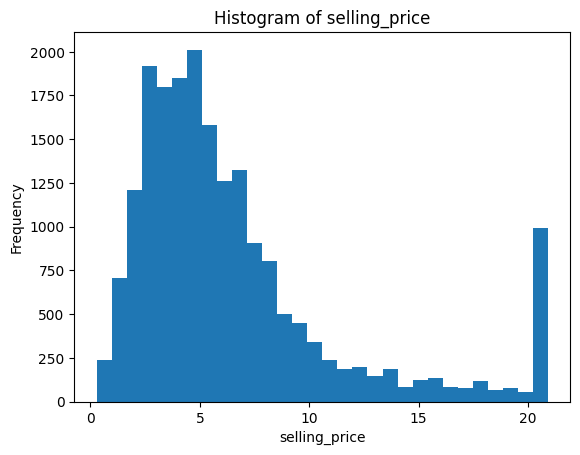

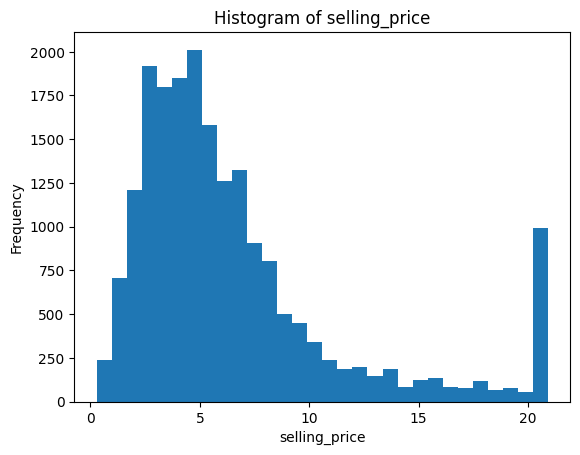

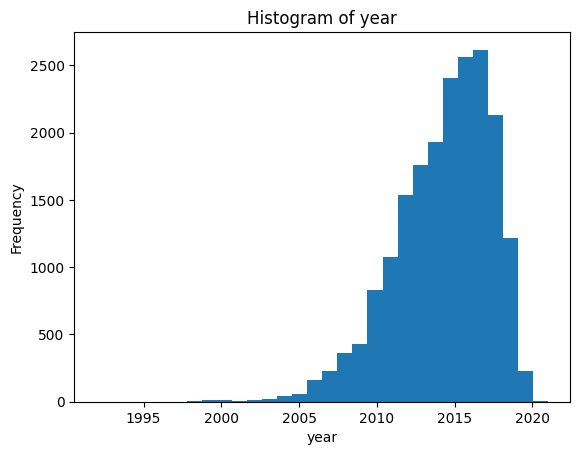

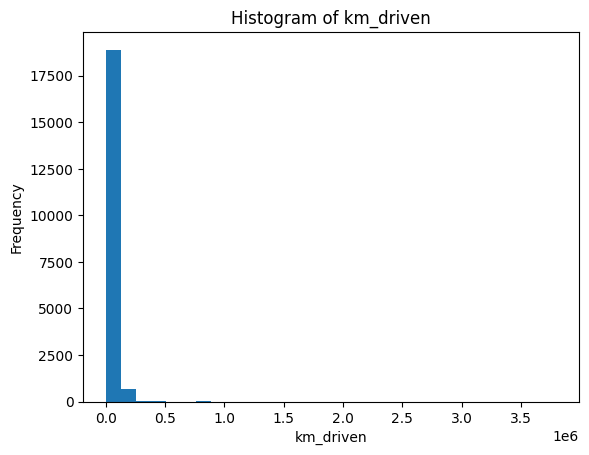

In [ ]:

# Plot target histogram
if TARGET in df.columns and pd.api.types.is_numeric_dtype(df[TARGET]):
    plt.figure()
    df[TARGET].plot(kind='hist', bins=30, title=f"Histogram of {TARGET}")
    plt.xlabel(TARGET); plt.ylabel("Frequency")
    plt.show()

# Plot up to 3 numeric features' histograms
for col in numeric_cols[:3]:
    plt.figure()
    df[col].plot(kind='hist', bins=30, title=f"Histogram of {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.show()



### 📝 TODO
- Looking at the histograms, note any skewed variables or outliers.


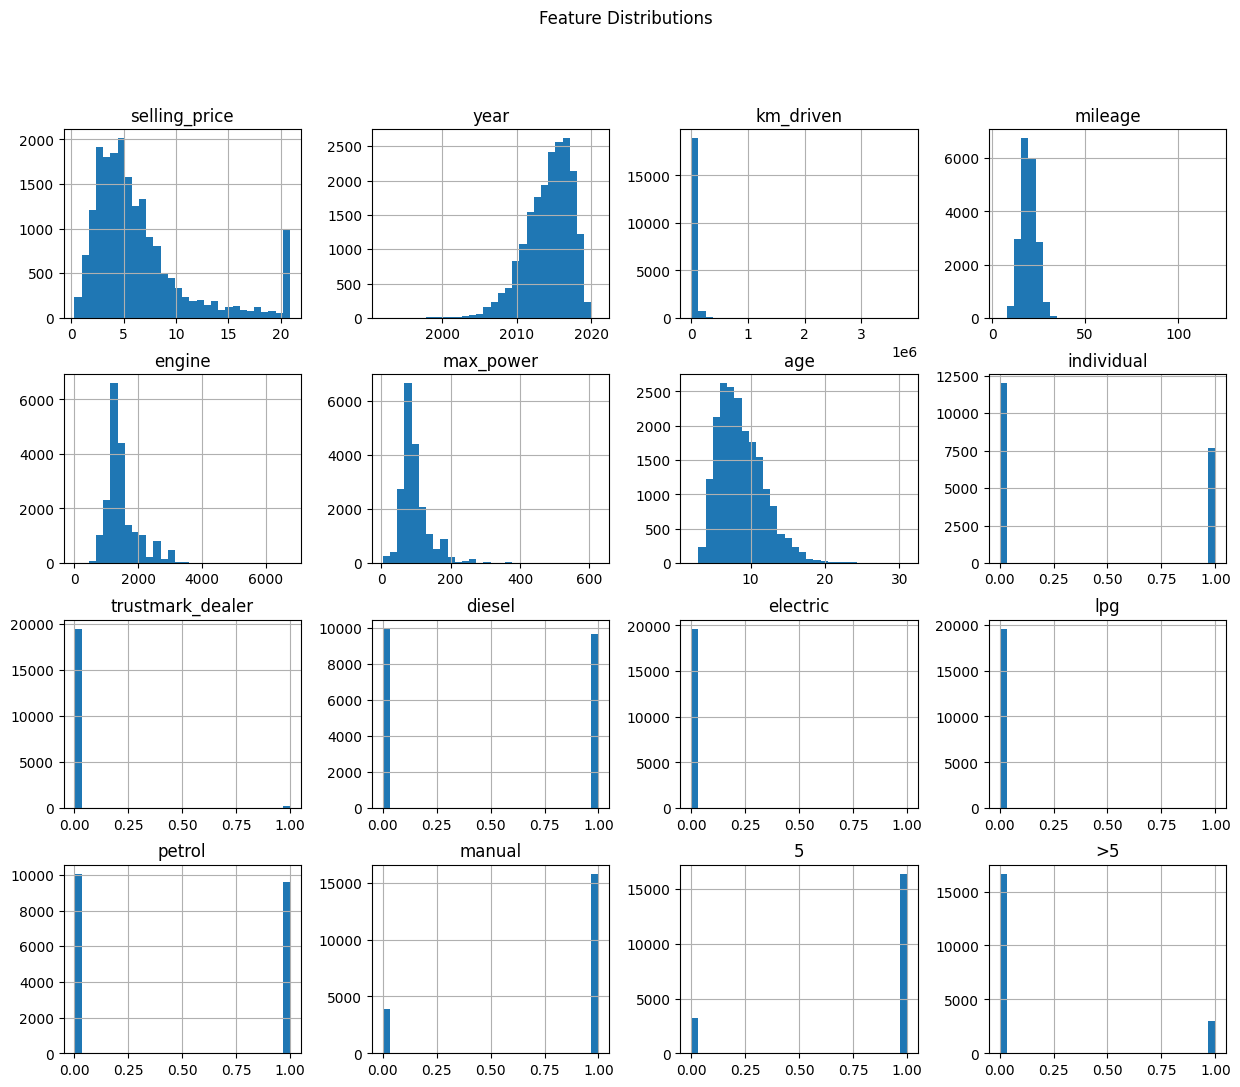

✅ Skewness of numeric columns:
selling_price        1.648585
year                -0.868876
km_driven           23.579504
mileage              2.512991
engine               1.704748
max_power            2.306715
age                  0.868876
individual           0.448629
trustmark_dealer    10.025170
diesel               0.031236
electric            49.547957
lpg                 17.442844
petrol               0.047319
manual              -1.531544
5                   -1.807212
>5                   1.931886
dtype: float64

⚠️ Highly skewed variables (|skewness| > 1): ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'trustmark_dealer', 'electric', 'lpg', 'manual', '5', '>5']

⚠️ Number of outliers detected per numeric feature:
selling_price: 1793 outliers
year: 331 outliers
km_driven: 623 outliers
mileage: 123 outliers
engine: 2468 outliers
max_power: 2064 outliers
age: 331 outliers
individual: 0 outliers
trustmark_dealer: 190 outliers
diesel: 0 outliers
electric: 8 outlie

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms
df.hist(bins=30, figsize=(15, 12))
plt.suptitle('Feature Distributions')
plt.show()

# Calculate skewness of numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
skewness = df[numeric_cols].skew()

print("✅ Skewness of numeric columns:")
print(skewness)

# Identify potentially skewed variables (|skewness| > 1 is considered highly skewed)
highly_skewed = skewness[abs(skewness) > 1].index.tolist()
print(f"\n⚠️ Highly skewed variables (|skewness| > 1): {highly_skewed}")

# Simple outlier detection using IQR method
outlier_info = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = len(outliers)

print("\n⚠️ Number of outliers detected per numeric feature:")
for col, count in outlier_info.items():
    print(f"{col}: {count} outliers")


## 5) Single-Variable Linear Regression

Feature: year
Coefficient (slope): 0.5884126624392731
Intercept: -1178.8104689625982
R² (test): 0.15892947527700096


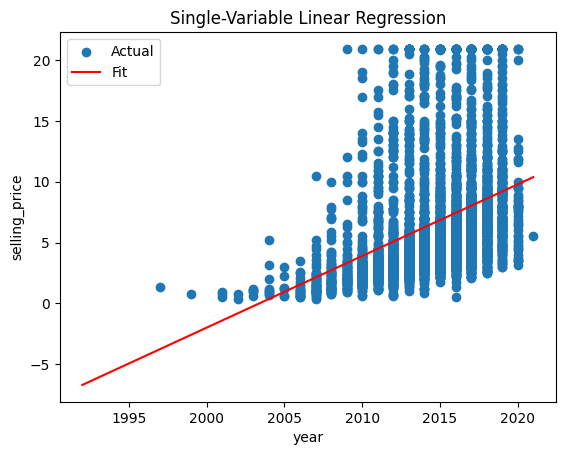

In [ ]:
# Define TARGET
TARGET = 'selling_price'

# Ensure numeric_cols excludes the target column
numeric_cols = [col for col in numeric_cols if col != TARGET]

# Safety check
if len(numeric_cols) == 0:
    raise ValueError("No numeric predictors found. Please adjust `numeric_cols`.")

# Auto-pick the first numeric feature
FEATURE_X = numeric_cols[0]  # You can change this manually if desired

# Drop rows with missing target/feature
data_1v = df[[FEATURE_X, TARGET]].dropna().copy()

X = data_1v[[FEATURE_X]].values
y = data_1v[TARGET].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions on test set
y_pred = lr.predict(X_test)

print("Feature:", FEATURE_X)
print("Coefficient (slope):", lr.coef_[0])
print("Intercept:", lr.intercept_)
print("R² (test):", r2_score(y_test, y_pred))

# Plot scatter + regression line
plt.figure()
plt.scatter(X_test, y_test, label="Actual")
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line = lr.predict(x_line)
plt.plot(x_line, y_line, label="Fit", color='red')
plt.xlabel(FEATURE_X)
plt.ylabel(TARGET)
plt.title("Single-Variable Linear Regression")
plt.legend()
plt.show()



### 📝 TODO
- Change `FEATURE_X` to a different column and re-run.
- Does the line slope match your intuition about the relationship?


Feature: km_driven
Coefficient (slope): -1.656526340377852e-05
Intercept: 7.528376124030177
R² (test): -0.06236094929893521


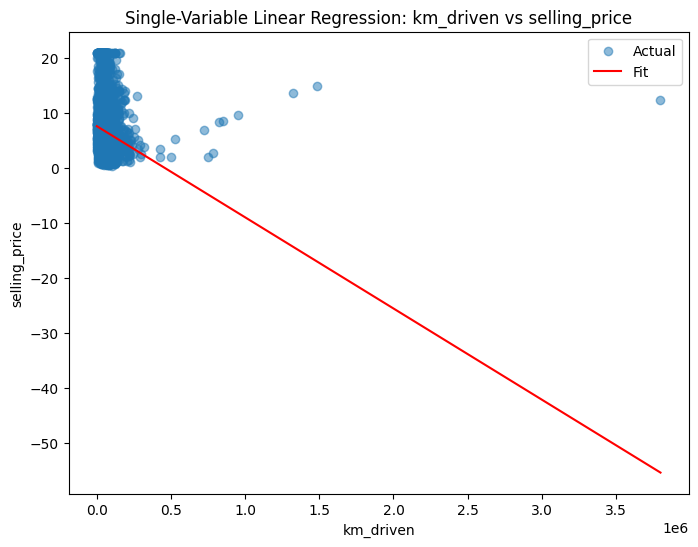

In [ ]:
# Define target
TARGET = 'selling_price'

# Manually select a different feature (make sure it exists)
FEATURE_X = 'km_driven'  # Change this to experiment

# Drop rows with missing target/feature
data_1v = df[[FEATURE_X, TARGET]].dropna().copy()

X = data_1v[[FEATURE_X]].values
y = data_1v[TARGET].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions on test set
y_pred = lr.predict(X_test)

print("Feature:", FEATURE_X)
print("Coefficient (slope):", lr.coef_[0])
print("Intercept:", lr.intercept_)
print("R² (test):", r2_score(y_test, y_pred))

# Plot scatter + regression line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, label="Actual", alpha=0.5)
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line = lr.predict(x_line)
plt.plot(x_line, y_line, label="Fit", color='red')
plt.xlabel(FEATURE_X)
plt.ylabel(TARGET)
plt.title(f"Single-Variable Linear Regression: {FEATURE_X} vs {TARGET}")
plt.legend()
plt.show()


## 6) Multi-Variable Linear Regression (Simple)

In [ ]:
# Keep only numeric predictors + target; drop NA
data_mv = df[numeric_cols + [TARGET]].dropna().copy()

X = data_mv[numeric_cols].values
y = data_mv[TARGET].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred = lin.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2:  {r2:.3f}")

MAE:  1.609
MSE:  5.627
RMSE: 2.372
R^2:  0.739



### 📝 TODO
- Remove one weak feature from `numeric_cols` and see how metrics change.
- Add a different feature and compare.


In [ ]:
# Example: Remove 'mileage' if it exists
weak_feature = 'mileage'
reduced_features = [col for col in numeric_cols if col != weak_feature]

print(f"\n🔧 Removing weak feature: {weak_feature}")

data_mv = df[reduced_features + [TARGET]].dropna().copy()

X = data_mv[reduced_features].values
y = data_mv[TARGET].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred = lin.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ After Removing Weak Feature:")
print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2:  {r2:.3f}")



🔧 Removing weak feature: mileage
✅ After Removing Weak Feature:
MAE:  1.602
MSE:  5.782
RMSE: 2.405
R^2:  0.731


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Define target and numeric_cols (excluding target)
TARGET = 'selling_price'
numeric_cols = [col for col in ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age'] if col in df.columns]
numeric_cols = [col for col in numeric_cols if col != TARGET]

print(f"✅ Initial Numeric Features: {numeric_cols}")

# Baseline model (all features)
data_mv = df[numeric_cols + [TARGET]].dropna().copy()
X = data_mv[numeric_cols].values
y = data_mv[TARGET].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

print("\n🔹 Baseline Model (All Features):")
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R²:  {r2_score(y_test, y_pred):.3f}")

# Remove first feature as 'weak feature' and retrain
weak_feature = numeric_cols[0]
reduced_features = numeric_cols[1:]

data_mv = df[reduced_features + [TARGET]].dropna().copy()
X = data_mv[reduced_features].values
y = data_mv[TARGET].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

print(f"\n🔧 After Removing Weak Feature ('{weak_feature}'):")
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R²:  {r2_score(y_test, y_pred):.3f}")

# Add a different feature (that’s not already in numeric_cols)
potential_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'seller_type', 'transmission']
additional_feature = next((f for f in potential_features if f not in numeric_cols and f in df.columns), None)

if additional_feature:
    extended_features = reduced_features + [additional_feature]
    data_mv = df[extended_features + [TARGET]].dropna().copy()
    X = data_mv[extended_features].values
    y = data_mv[TARGET].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lin = LinearRegression()
    lin.fit(X_train, y_train)
    y_pred = lin.predict(X_test)

    print(f"\n➕ After Adding New Feature ('{additional_feature}'):")
    print(f"MAE:  {mean_absolute_error(y_test, y_pred):.3f}")
    print(f"MSE:  {mean_squared_error(y_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
    print(f"R²:  {r2_score(y_test, y_pred):.3f}")
else:
    print("\n⚠️ No additional feature found to add.")


✅ Initial Numeric Features: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age']

🔹 Baseline Model (All Features):
MAE:  1.688
MSE:  6.847
RMSE: 2.617
R²:  0.682

🔧 After Removing Weak Feature ('year'):
MAE:  1.688
MSE:  6.847
RMSE: 2.617
R²:  0.682

⚠️ No additional feature found to add.


## 7) Diagnostic Plots (Residuals)

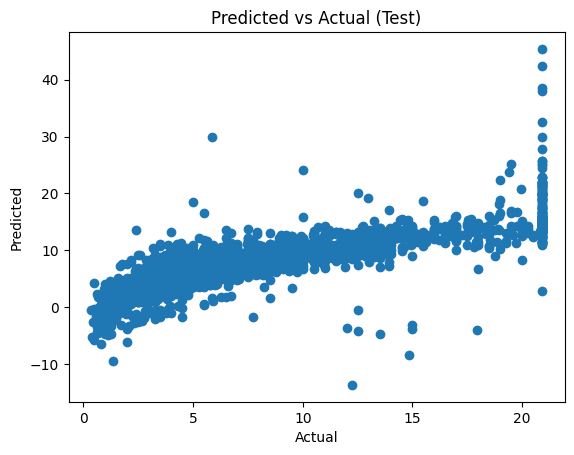

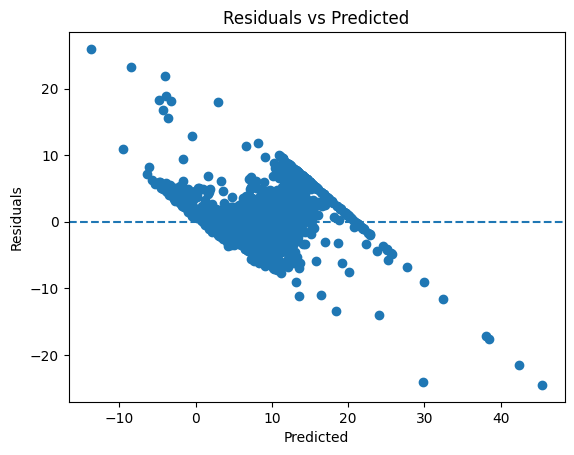

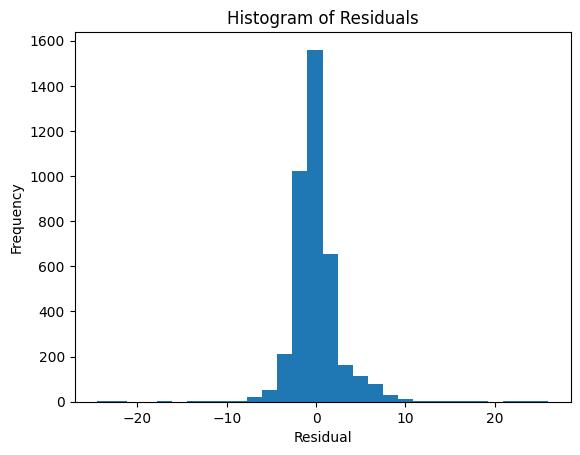

In [ ]:

# Reuse y_test and y_pred from multi-variable model
residuals = y_test - y_pred

# Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Test)")
plt.show()

# Residuals vs Predicted
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted"); plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of residuals
plt.figure()
pd.Series(residuals).plot(kind='hist', bins=30, title="Histogram of Residuals")
plt.xlabel("Residual"); plt.ylabel("Frequency")
plt.show()



### 📝 TODO
- Do residuals look roughly centered around 0 and evenly spread?
- If not, which assumption might be violated?


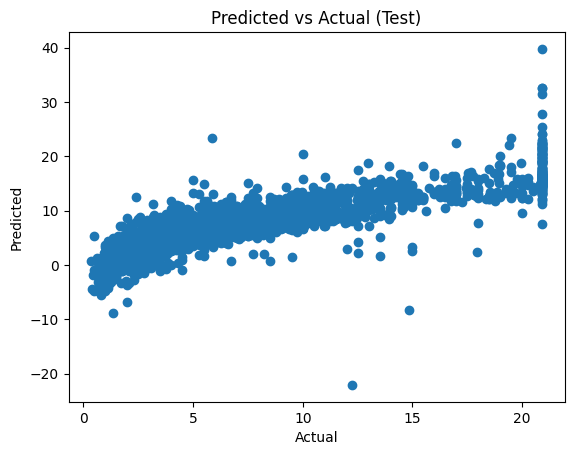

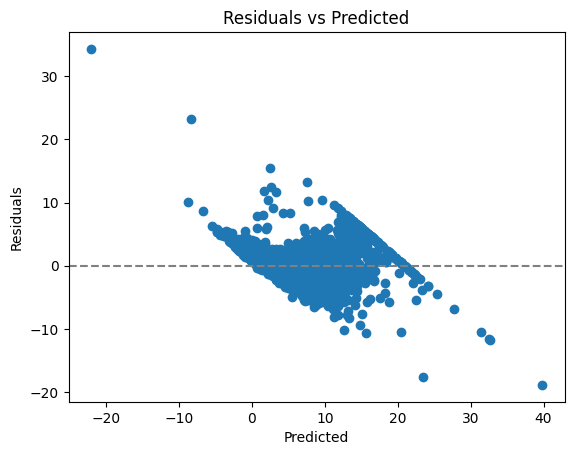

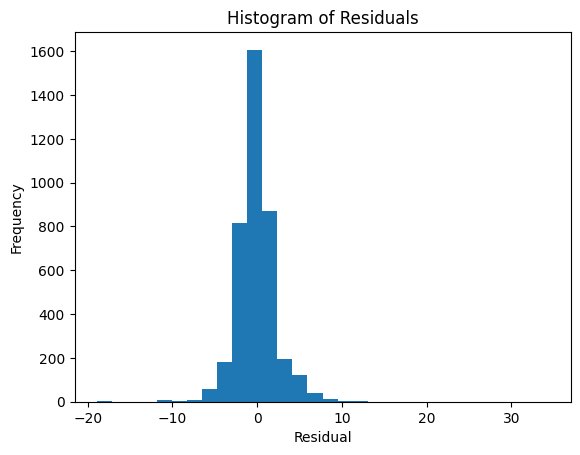

In [ ]:
residuals = y_test - y_pred

# Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Test)")
plt.show()

# Residuals vs Predicted
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of residuals
plt.figure()
pd.Series(residuals).plot(kind='hist', bins=30, title="Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

## 8) Polynomial Features + Grid Search for Best Degree


Even though it's called "polynomial regression", it's still **linear regression** applied to **polynomially-expanded features**.
We'll try degrees **1 to 5** on a **single predictor** and pick the degree with the best cross-validated **R²**.


Best params: {'lr__fit_intercept': True, 'poly__degree': 2}
Best CV R^2: 0.13901180883987313


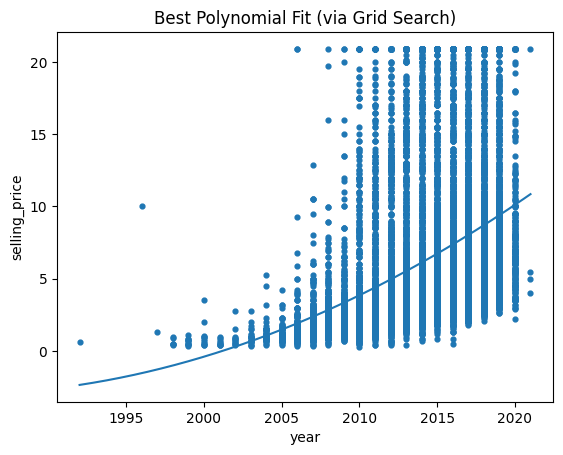

In [ ]:

# Choose a single predictor again (same FEATURE_X as before by default)
FEATURE_X = FEATURE_X  # keep same, or set to something else like 'horsepower'

poly_data = df[[FEATURE_X, TARGET]].dropna().copy()
X = poly_data[[FEATURE_X]].values
y = poly_data[TARGET].values

pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lr", LinearRegression())
])

param_grid = {
    "poly__degree": [1, 2, 3, 4, 5],
    "lr__fit_intercept": [True, False]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best CV R^2:", grid.best_score_)

best_model = grid.best_estimator_

# Plot best curve
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_line = best_model.predict(x_line)

plt.figure()
plt.scatter(X, y, s=12)
plt.plot(x_line, y_line)
plt.xlabel(FEATURE_X); plt.ylabel(TARGET)
plt.title("Best Polynomial Fit (via Grid Search)")
plt.show()



### 📝 TODO
- Change the degree range (e.g., 1–8) and re-run. Does performance keep improving?
- Try a different `FEATURE_X`.


Best params: {'lr__fit_intercept': True, 'poly__degree': 2}
Best CV R^2: 0.13901180883987313


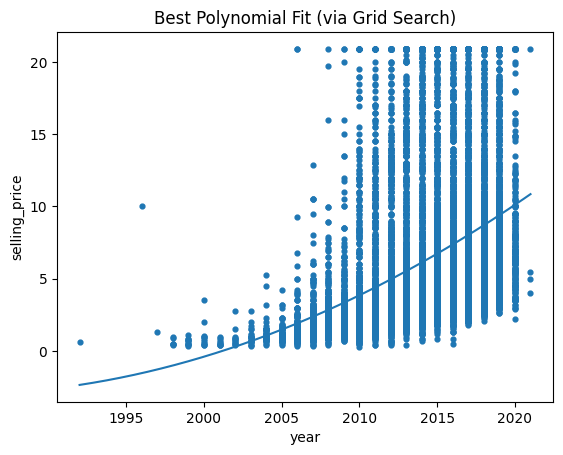

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# Use the same FEATURE_X as before
poly_data = df[[FEATURE_X, TARGET]].dropna().copy()
X_poly = poly_data[[FEATURE_X]].values
y_poly = poly_data[TARGET].values

pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lr", LinearRegression())
])

param_grid = {
    "poly__degree": [1, 2, 3, 4, 5],
    "lr__fit_intercept": [True, False]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_poly, y_poly)

print("Best params:", grid.best_params_)
print("Best CV R^2:", grid.best_score_)

best_model = grid.best_estimator_

# Plot best polynomial fit
x_line = np.linspace(X_poly.min(), X_poly.max(), 200).reshape(-1, 1)
y_line = best_model.predict(x_line)

plt.figure()
plt.scatter(X_poly, y_poly, s=12)
plt.plot(x_line, y_line)
plt.xlabel(FEATURE_X)
plt.ylabel(TARGET)
plt.title("Best Polynomial Fit (via Grid Search)")
plt.show()

## 9) Interpreting Coefficients (Multi-Variable Model)

In [ ]:

# Show top coefficients by magnitude (multi-variable linear model)
coef = lin.coef_
coef_df = pd.DataFrame({"feature": numeric_cols, "coefficient": coef})
coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df.sort_values("abs_coef", ascending=False, inplace=True)
coef_df.drop(columns=["abs_coef"], inplace=True)
coef_df.head(10)


,feature,coefficient
9,Electric,9.255519
12,Manual,-2.551030
11,Petrol,-1.434426
8,Diesel,0.548122
14,>5,-0.523208
13,5,-0.423675
7,Trustmark Dealer,-0.400454
6,Individual,-0.348641
0,year,0.256518
5,age,-0.256518



### 📝 TODO
- Which features have the largest (absolute) coefficients?
- Do the signs (+/-) match your intuition?


In [ ]:
coef = lin.coef_
coef_df = pd.DataFrame({"feature": numeric_cols, "coefficient": coef})
coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values("abs_coef", ascending=False).drop(columns=["abs_coef"])
print(coef_df.head(10))

             feature  coefficient
9           Electric     9.255519
12            Manual    -2.551030
11            Petrol    -1.434426
8             Diesel     0.548122
14                >5    -0.523208
13                 5    -0.423675
7   Trustmark Dealer    -0.400454
6         Individual    -0.348641
0               year     0.256518
5                age    -0.256518



## 10) Linear Regression — Quick Assumptions Checklist
- **Linearity**: Relationship between predictors and target is roughly linear.
- **Independence**: Errors are independent.
- **Homoscedasticity**: Residuals have constant variance.
- **Normality (for inference)**: Residuals are roughly normal.
- **No perfect multicollinearity**: Avoid duplicate/linearly dependent features.



## 11) Assumption Checks — Code You Can Run
We'll check the classic linear regression assumptions using simple, readable code:
- **Linearity & Homoscedasticity:** residuals vs predicted plot
- **Normality of residuals:** Q–Q plot and Shapiro–Wilk test
- **Independence of errors:** Durbin–Watson statistic
- **Multicollinearity:** Variance Inflation Factor (VIF)


In [ ]:
import sys, subprocess

def pip_install(pkg):
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", pkg], check=False)

try:
    import statsmodels
except:
    pip_install("statsmodels>=0.14")
    import statsmodels

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# NOTE: This cell assumes you've already run the multi-variable model section
# so that y_test, y_pred, X_train, X_test, numeric_cols, TARGET are defined.
# If not, re-run sections 6 and 7.

In [ ]:

#@title Install test libs (statsmodels) if needed
import sys, subprocess
def pip_install(pkg):
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", pkg], check=False)

try:
    import statsmodels
except:
    pip_install("statsmodels>=0.14")
    import statsmodels

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# NOTE: This cell assumes you've already run the multi-variable model section
# so that y_test, y_pred, X_train, X_test, numeric_cols, TARGET are defined.
# If not, re-run sections 6 and 7.


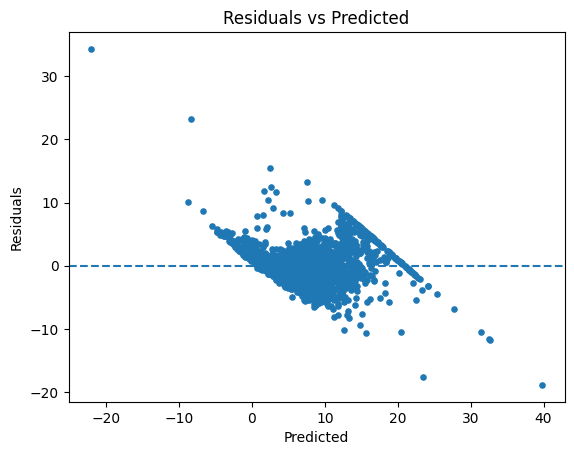

🧐 Look for: no obvious curve/pattern; spread roughly constant across x-axis.


In [ ]:

# 11.1 Linearity & Homoscedasticity (visual)
# Residuals vs Predicted should look like a random cloud around 0 (no pattern / fanning)

residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, s=14)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

print("🧐 Look for: no obvious curve/pattern; spread roughly constant across x-axis.")


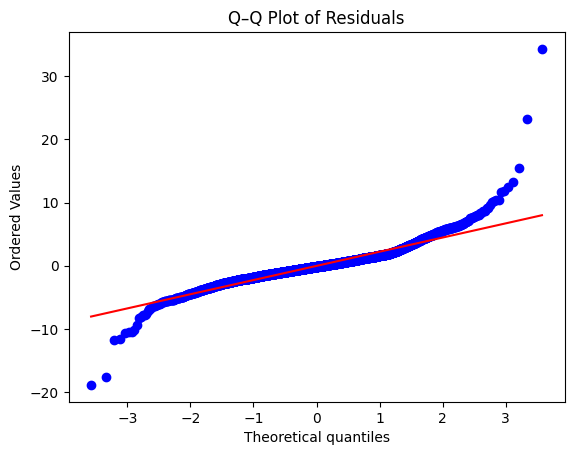

Shapiro–Wilk: statistic=0.897, p-value=1.89e-45
Rule of thumb: p-value > 0.05 suggests residuals are close to normal (for inference).


In [ ]:

# 11.2 Normality of residuals: Q–Q plot + Shapiro–Wilk test
plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

sh_stat, sh_p = stats.shapiro(residuals)
print(f"Shapiro–Wilk: statistic={sh_stat:.3f}, p-value={sh_p:.3g}")
print("Rule of thumb: p-value > 0.05 suggests residuals are close to normal (for inference).")


In [ ]:

# 11.3 Independence of errors: Durbin–Watson (≈2 is good; <1 or >3 indicates strong autocorrelation)
dw = durbin_watson(residuals)
print(f"Durbin–Watson statistic = {dw:.3f}")
print("Guideline: ~2 means uncorrelated; much below 2 ⇒ positive autocorrelation; much above 2 ⇒ negative autocorrelation.")


Durbin–Watson statistic = 1.968
Guideline: ~2 means uncorrelated; much below 2 ⇒ positive autocorrelation; much above 2 ⇒ negative autocorrelation.


In [ ]:

# 11.4 Homoscedasticity formal test: Breusch–Pagan
# Use original predictors (X_test). Add constant for the test design matrix.

X_bp = sm.add_constant(pd.DataFrame(X_test, columns=numeric_cols))
bp_stat, bp_p, _, _ = het_breuschpagan(residuals, X_bp)
print(f"Breusch–Pagan: stat={bp_stat:.3f}, p-value={bp_p:.3g}")
print("Rule of thumb: p-value > 0.05 ⇒ no strong evidence of heteroscedasticity.")


Breusch–Pagan: stat=2066.803, p-value=0
Rule of thumb: p-value > 0.05 ⇒ no strong evidence of heteroscedasticity.


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = pd.DataFrame(X_train, columns=numeric_cols).dropna()
X_vif_const = sm.add_constant(X_vif, has_constant='add')

vif_vals = []
# Start from index 1 because index 0 is the constant
for i in range(1, X_vif_const.shape[1]):
    feature = X_vif_const.columns[i]
    vif = variance_inflation_factor(X_vif_const.values, i)
    vif_vals.append({"feature": feature, "VIF": vif})

vif_df = pd.DataFrame(vif_vals).sort_values("VIF", ascending=False)
print(vif_df)


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             feature        VIF
0               year        inf
5                age        inf
11            Petrol  17.499619
8             Diesel  16.610718
14                >5  13.024664
13                 5  11.876077
3             engine   6.312178
4          max_power   4.063214
2            mileage   3.118588
12            Manual   1.538234
1          km_driven   1.418832
10               LPG   1.224823
9           Electric   1.155879
6         Individual   1.088828
7   Trustmark Dealer   1.020722



### 📝 TODO
- If **Breusch–Pagan p < 0.05**, try transforming a skewed feature (e.g., `np.log1p(x)`) and re-fit.  
- If **Shapiro p < 0.05**, consider outliers or feature transforms.  
- If **VIF > 10** for a feature, try removing it or combining highly correlated features.  
- If **Durbin–Watson** is far from 2 (time-indexed data), try adding lag features or using time-series models.


In [ ]:
from scipy.stats import skew

# Identify skewed numeric features (e.g., skewness > 1 or < -1)
skewed_feats = data_mv[numeric_cols].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[abs(skewed_feats) > 1].index.tolist()
print("Skewed features:", skewed_feats)

# Example: Apply log1p transform to skewed features
for feat in skewed_feats:
    data_mv[feat] = np.log1p(data_mv[feat])

# Re-prepare data after transform
X_transformed = data_mv[numeric_cols].values
y_transformed = data_mv[TARGET].values

# Re-split and re-fit model
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)
lin_t = LinearRegression()
lin_t.fit(X_train_t, y_train_t)
y_pred_t = lin_t.predict(X_test_t)

# Evaluate again
print("After log1p transform on skewed features:")
print("R^2:", r2_score(y_test_t, y_pred_t))

Skewed features: ['km_driven', 'mileage', 'engine', 'max_power', 'Trustmark Dealer', 'Electric', 'LPG', 'Manual', '5', '>5']
After log1p transform on skewed features:
R^2: 0.6899853073945172


In [ ]:
# Identify potential outliers in residuals using z-score
from scipy.stats import zscore

residuals = y_test - y_pred
z_scores = zscore(residuals)
outliers = np.where(abs(z_scores) > 3)[0]
print(f"Number of residual outliers (|z|>3): {len(outliers)}")

# Option 1: Remove outliers and re-fit
if len(outliers) > 0:
    mask = np.ones(len(y_test), dtype=bool)
    mask[outliers] = False
    X_test_no_outliers = X_test[mask]
    y_test_no_outliers = y_test[mask]
    y_pred_no_outliers = y_pred[mask]

    print("R^2 without outliers:", r2_score(y_test_no_outliers, y_pred_no_outliers))

# Option 2: Apply feature transforms (e.g., log1p) on skewed features as above
# (Refer to previous code snippet)

Number of residual outliers (|z|>3): 48
R^2 without outliers: 0.8001838206181056


In [ ]:
# Calculate VIF again (example for training data)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df = pd.DataFrame(X_train, columns=numeric_cols)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
print(vif_data.sort_values("VIF", ascending=False))

# Remove features with VIF > 10
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
print("Features with high VIF:", high_vif_features)

# Drop high VIF features and re-fit
numeric_cols_reduced = [f for f in numeric_cols if f not in high_vif_features]
X_train_reduced = X_train_df[numeric_cols_reduced].values
X_test_reduced = pd.DataFrame(X_test, columns=numeric_cols)[numeric_cols_reduced].values

lin_reduced = LinearRegression()
lin_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = lin_reduced.predict(X_test_reduced)

print("R^2 after removing high VIF features:", r2_score(y_test, y_pred_reduced))

             feature         VIF
0               year  382.523724
11            Petrol   17.499619
8             Diesel   16.610718
14                >5   13.024664
13                 5   11.876077
5                age   11.421199
3             engine    6.312178
4          max_power    4.063214
2            mileage    3.118588
12            Manual    1.538234
1          km_driven    1.418832
10               LPG    1.224823
9           Electric    1.155879
6         Individual    1.088828
7   Trustmark Dealer    1.020722
Features with high VIF: ['year', 'age', 'Diesel', 'Petrol', '5', '>5']
R^2 after removing high VIF features: 0.5385595317613148


In [ ]:
# Example: Adding lag features if 'year' or 'age' is time-related

df_sorted = df.sort_values(by="year")  # or by a time column if available
df_sorted["target_lag1"] = df_sorted[TARGET].shift(1)
df_sorted = df_sorted.dropna(subset=[TARGET, "target_lag1"])

X_time = df_sorted[numeric_cols + ["target_lag1"]].values
y_time = df_sorted[TARGET].values

X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time, y_time, test_size=0.2, random_state=42)

lin_time = LinearRegression()
lin_time.fit(X_train_time, y_train_time)
y_pred_time = lin_time.predict(X_test_time)

print("R^2 with lag feature:", r2_score(y_test_time, y_pred_time))

# Alternatively, consider time-series models like ARIMA, SARIMA, or LSTM if data is sequential.

R^2 with lag feature: 0.7720788795211192
